# E-Commerce Data

### Dataset Information

This is a transnational data set which contains all the transactions occurring between  
01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.  
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Additional Variable Information

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
    * If this code starts with letter 'c', it indicates a cancellation.   
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
* Description: Product (item) name. Nominal.  
* Quantity: The quantities of each product (item) per transaction. Numeric.	  
* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.  
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.  
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
* Country: Country name. Nominal, the name of the country where each customer resides.


  Data source: https://archive.ics.uci.edu/dataset/352/online+retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel('Online Retail.xlsx')

# Data Exploration

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**Check for, and remove missing values**

In [181]:
data.dropna(inplace=True)

**Create additional Variables from Data**

In [8]:
data['TotalPrice']  = data['Quantity']*data['UnitPrice']

In [9]:
data['Region'] = np.where(data['Country']=='United Kingdom', 'UK', 'non UK')

In [10]:
data['Region'].value_counts()

Region
UK        361878
non UK     44951
Name: count, dtype: int64

In [11]:
data['Year'] = data['InvoiceDate'].apply(lambda x: x.year)
data['Month'] = data['InvoiceDate'].apply(lambda x: x.month)
data['Quarter'] = data['InvoiceDate'].apply(lambda x: x.quarter)
data['Week'] = data['InvoiceDate'].apply(lambda x: x.week)

### Net Sales by Week, Month and Quarter

Text(0.5, 0.98, 'Net Sales by Week, Month and Quarter')

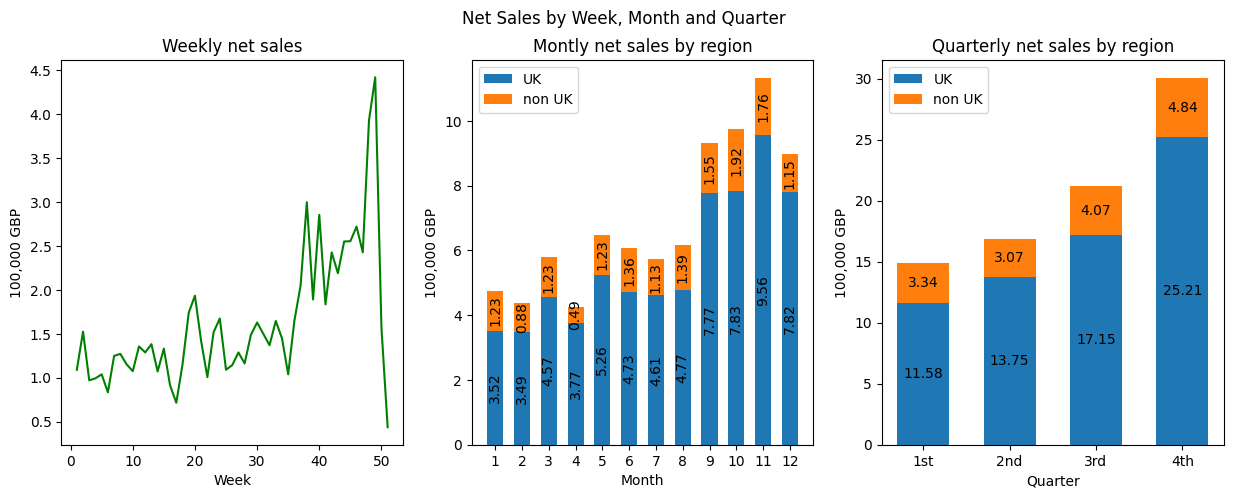

In [180]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
    
ax[0].plot(data.sort_values('Week')['Week'].unique(), data.sort_values('Week')\
           .groupby('Week')['TotalPrice'].sum()/100000, color='g')
    

ax[0].set_title('Weekly net sales')
ax[0].set_xlabel('Week')
ax[0].set_ylabel('100,000 GBP')


spec_q = ['1st', '2nd', '3rd', '4th']
bottom_q=np.zeros(4)
width = 0.6

regions_q = {
    'UK': data.sort_values('Quarter')[data.sort_values('Quarter')['Region']=='UK']\
        .groupby('Quarter')['TotalPrice'].sum()/100000,
    
    'non UK': data.sort_values('Quarter')[data.sort_values('Quarter')['Region']=='non UK']\
        .groupby('Quarter')['TotalPrice'].sum()/100000
}

for k, v in regions_q.items():
    p = ax[2].bar(spec_q, v, width, label=k, bottom=bottom_q)
    bottom_q += v

    ax[2].bar_label(p, fmt='%.2f', label_type='center')

ax[2].set_title('Quarterly net sales by region')
ax[2].legend()
ax[2].set_xlabel('Quarter')
ax[2].set_ylabel('100,000 GBP')


spec_m = data.sort_values('Month')['Month'].unique()
bottom_m=np.zeros(len(spec_m))
width = 0.6

regions_m = {
    'UK': data.sort_values('Month')[data.sort_values('Month')['Region']=='UK']\
        .groupby('Month')['TotalPrice'].sum()/100000,
    
    'non UK': data.sort_values('Month')[data.sort_values('Month')['Region']=='non UK']\
        .groupby('Month')['TotalPrice'].sum()/100000
}

for k, v in regions_m.items():
    p = ax[1].bar(spec_m, v, width, label=k, bottom=bottom_m)
    bottom_m += v

    ax[1].bar_label(p, fmt='%.2f', label_type='center', rotation=90)

ax[1].set_title('Montly net sales by region')
ax[1].legend()
ax[1].set_xlabel('Month')
ax[1].set_ylabel('100,000 GBP')
ax[1].set_xticks(spec_m)

fig.suptitle('Net Sales by Week, Month and Quarter')

## Sales by Product

**Products with highest net sales by value:**

In [14]:
data.groupby(['StockCode','Description']).sum(numeric_only=True)\
    .sort_values('TotalPrice', ascending=False)[['TotalPrice', 'Quantity']].head(10)

,,TotalPrice,Quantity
StockCode,Description,,
22423,REGENCY CAKESTAND 3 TIER,132870.40,11555
85123A,WHITE HANGING HEART T-LIGHT HOLDER,93823.85,34147
85099B,JUMBO BAG RED RETROSPOT,83236.76,45066
47566,PARTY BUNTING,67687.53,15027
POST,POSTAGE,66710.24,3002
84879,ASSORTED COLOUR BIRD ORNAMENT,56499.22,35314
23084,RABBIT NIGHT LIGHT,51137.80,27094
79321,CHILLI LIGHTS,45936.81,9570
22086,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48,15164


**Products with lowest net sales by value:**

In [15]:
data.groupby(['StockCode','Description']).sum(numeric_only=True)\
    .sort_values('TotalPrice', ascending=True)[['TotalPrice', 'Quantity']].head(10)

,,TotalPrice,Quantity
StockCode,Description,,
M,Manual,-58385.46,3184
CRUK,CRUK Commission,-7933.43,-16
D,Discount,-5696.22,-1194
22769,CHALKBOARD KITCHEN ORGANISER,-87.80,-4
79323W,WHITE CHERRY LIGHTS,-54.00,-8
85063,CREAM SWEETHEART MAGAZINE RACK,-46.85,-3
35400,WOODEN BOX ADVENT CALENDAR,-45.70,-6
21645,ASSORTED TUTTI FRUTTI ROUND BOX,-39.60,-24
79323P,PINK CHERRY LIGHTS,-27.00,-4


**Products with highest net sales by quantity:**

In [16]:
data.groupby(['StockCode','Description']).sum(numeric_only=True)\
    .sort_values('Quantity', ascending=False)[['Quantity']].head(10)

,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409
22197,POPCORN HOLDER,30504
23084,RABBIT NIGHT LIGHT,27094
22492,MINI PAINT SET VINTAGE,25880
22616,PACK OF 12 LONDON TISSUES,25321


**Products with lowest net sales by quantity:**

In [17]:
data.groupby(['StockCode','Description']).sum(numeric_only=True)\
    .sort_values('Quantity', ascending=True)[['Quantity']].head(10)

,,Quantity
StockCode,Description,
84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-1460
D,Discount,-1194
21645,ASSORTED TUTTI FRUTTI ROUND BOX,-24
CRUK,CRUK Commission,-16
21144,PINK POODLE HANGING DECORATION,-12
22034,ROBIN CHRISTMAS CARD,-9
79323W,WHITE CHERRY LIGHTS,-8
21412,VINTAGE GOLD TINSEL REEL,-6
35400,WOODEN BOX ADVENT CALENDAR,-6


**Products with highest gross sales by quantity:**

In [18]:
data[data['Quantity']>0].groupby(['StockCode','Description']).sum(numeric_only=True)\
    .sort_values('Quantity', ascending=False)[['Quantity']].head(10)

,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
85099B,JUMBO BAG RED RETROSPOT,46181
85123A,WHITE HANGING HEART T-LIGHT HOLDER,36725
84879,ASSORTED COLOUR BIRD ORNAMENT,35362
21212,PACK OF 72 RETROSPOT CAKE CASES,33693
22197,POPCORN HOLDER,30931
23084,RABBIT NIGHT LIGHT,27202


**Products with highest return numbers**

In [19]:
data[data['Quantity']<0].groupby(['StockCode','Description']).sum(numeric_only=True)\
    .sort_values('Quantity', ascending=True)[['Quantity']].head(10)

,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",-80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,-74494
84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
M,Manual,-3995
21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
20971,PINK BLUE FELT CRAFT TRINKET BOX,-2617
85123A,WHITE HANGING HEART T-LIGHT HOLDER,-2578
21175,GIN + TONIC DIET METAL SIGN,-2030
22920,HERB MARKER BASIL,-1527


## Order Size by Region

In [20]:
data[data['Quantity']>0].groupby('Region')[['Quantity']].mean(numeric_only=True)

,Quantity
Region,
UK,12.048913
non UK,20.932651


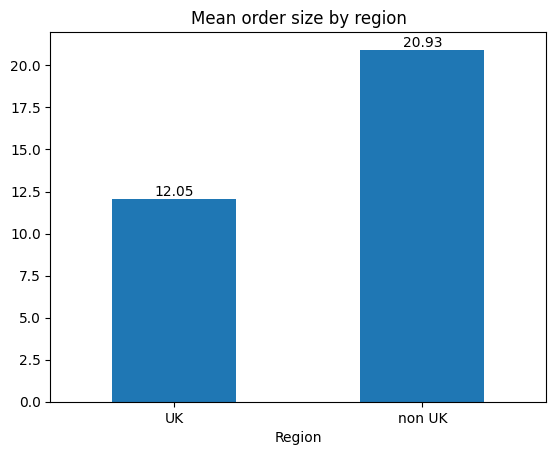

In [21]:
bars = data[data['Quantity']>0].groupby('Region')[['Quantity']].mean(numeric_only=True)
ax = bars.plot(kind='bar', title='Mean order size by region', legend=False, rot=0)

x_pos = np.arange(len(bars))

for heights in ax.containers:
    ax.bar_label(heights, fmt='%.2f') 


## Quarterly revenue growth

In [22]:
quarterly = list(data.groupby('Quarter')['TotalPrice'].sum())

In [23]:
growth = []

for i in range(len(quarterly))[1:]:
    g = (quarterly[i] - quarterly[i-1]) / quarterly[i-1] * 100
    growth.append(g)
    print('The growth for quarter %i is %.2f' % (i+1, g) + '%')

y_growth = np.mean(growth)

print('The average growth over the year is %.2f' % y_growth + '%')

The growth for quarter 2 is 12.79%
The growth for quarter 3 is 26.14%
The growth for quarter 4 is 41.57%
The average growth over the year is 26.83%


# XYZ-Analysis



The YXZ-analysis helps to improve the invetory management by classifying  
individual products according to their demand variability  

'X'-items have a low CV (CV <= 10%). A low CV indicates a steady demand  
that fluctuates rarely, and a high predictability. The ability to schedule  
is high  
'Y'-items have a moderate CV (10 < CV <= 35). This indicates a less steady  
demand with wilder fluctuations often due to seasonal reasons. The ability  
to schedule is moderate.  
'Z'-items have a high CV (CV >35), the demand is completely unsteady and   
predictability, and the ability to schedule are low.  

**First check for Density**

Text(0.5, 1.0, 'Density of ordered products (log)')

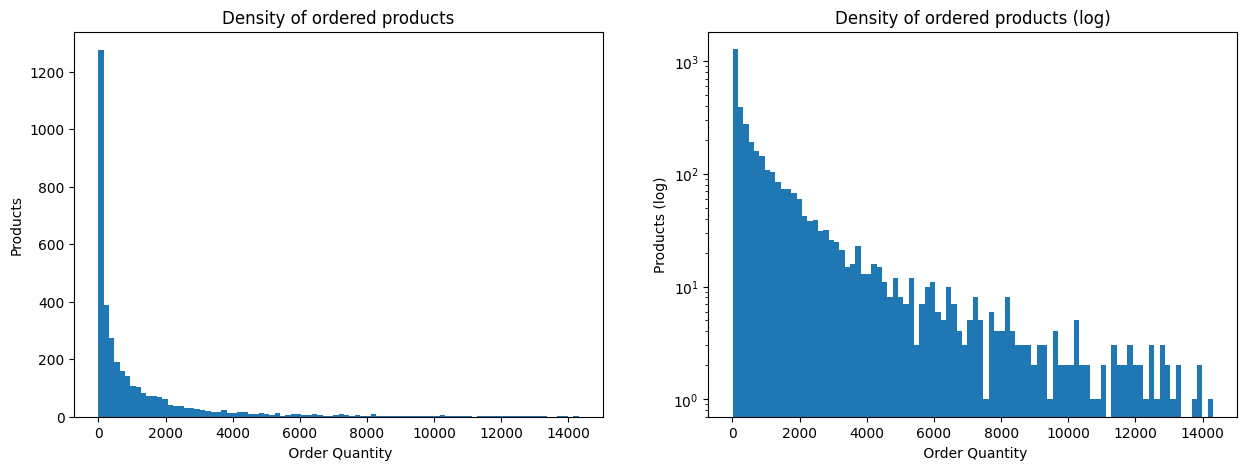

In [155]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(data[data['Quantity']>0].groupby('StockCode')['Quantity'].sum().sort_values()[30:-30], bins=90, log=False)
ax[1].hist(data[data['Quantity']>0].groupby('StockCode')['Quantity'].sum().sort_values()[30:-30], bins=90, log=True)

ax[0].set_xlabel(' Order Quantity')
ax[0].set_ylabel('Products')
ax[0].set_title('Density of ordered products')

ax[1].set_xlabel(' Order Quantity')
ax[1].set_ylabel('Products (log)')
ax[1].set_title('Density of ordered products (log)')

The histogram shows that the company sells a large variety of individual products  
at a very small quantity per product. The large product variety implies a high coefficient  
of variation for each product and a low predictability overall. It is to be expected, that the  
vast majority of product will fall in the 'Z' category.  

## Classification

Grouping the StockCode quantity by month allows to calculate  
the coefficient of variation (CV) for each product.  

In [182]:
stock_sum=data[data['Quantity']>0].groupby(['Month', 'StockCode'])['Quantity'].sum(numeric_only=True).to_frame()
stock_sum.reset_index(level=[0,1], inplace=True)

### Group by Product and calculate Coefficient ov Variation

In [157]:
stock_stat=stock_sum.groupby('StockCode')['Quantity'].describe()
stock_stat['CV'] = stock_stat['std'] / stock_stat['mean'] *100
stock_stat.drop(['min', 'max', '25%', '50%', '75%'], axis=1, inplace=True)
stock_stat.sort_values('CV')

,count,mean,std,CV
StockCode,,,,
84968B,2.0,1.0,0.0,0.0
90003E,2.0,4.0,0.0,0.0
90001C,2.0,1.0,0.0,0.0
90001B,2.0,2.0,0.0,0.0
22987,4.0,25.0,0.0,0.0
...,...,...,...,...
90214O,1.0,12.0,NaN,NaN
90214T,1.0,12.0,NaN,NaN
90214U,1.0,12.0,NaN,NaN


### Categorising Products

Some products have a standard deviation of 0 which results in a CV of 0.   
The CV has to be set to NaN since this data is useless for the analysis.  

Products with missing CV values have a count of 1 or a std of 0. These products  
have been sold very infrequently and thus qualify as 'Z' items.  

The remaining data is categorised by CV.  

In [158]:
def get_xyz(x):
    if pd.notnull(x):
        if 0 < x <= 10:
            return 'X'
        elif 10 <  x <= 35:
            return 'Y'
        else:
            return 'Z'
    else:
        return np.nan

In [165]:
stock_stat['CV'] = stock_stat['CV'].apply(lambda x: np.nan if x==0 else x)
stock_stat['XYZ'] = stock_stat['CV'].apply(get_xyz)

## Results

**Distribution of XYZ-Analysis**

In [164]:
xyz = stock_stat['XYZ'].value_counts()
xyz = xyz.reset_index()
xyz['XYZ_%'] = xyz['count'] / xyz['count'].sum() * 100
xyz.set_index('XYZ')

,count,XYZ_%
XYZ,,
Z,3230,95.280236
Y,154,4.542773
X,6,0.176991


**Products with lowest CV**

In [176]:
stock_stat.sort_values('CV').head(10)

,count,mean,std,CV,XYZ
StockCode,,,,,
23598,2.0,210.500000,0.707107,0.335918,X
85118,2.0,71.000000,1.414214,1.991850,X
23448,2.0,12.500000,0.707107,5.656854,X
90214I,2.0,12.500000,0.707107,5.656854,X
35597D,2.0,23.000000,1.414214,6.148755,X
21392,2.0,16.000000,1.414214,8.838835,X
23412,2.0,175.500000,20.506097,11.684386,Y
10124G,4.0,4.250000,0.500000,11.764706,Y
85028S,2.0,12.000000,1.414214,11.785113,Y


## Interpretation

As expected, the number of 'X' and 'Y' products is very low. However, even  
these products have been sold very unfrequently, the table above shows that  
most of the top 10 (by CV) products have only been sold in two month of the year.  

The small amount of datapoints for these products is insuficient  
to calculate the coefficient of variation and causes an incorrect   
classification of these products. Thus, it can be assumed, that all  
products have a high degree of variability. The following table   
further supports this thesis, as it shows that the assumed 'X'   
products have been sold very infrequent and at a very small number.  

In [175]:
x = stock_stat.reset_index().sort_values('CV').head(6)['StockCode']
data[(data['StockCode'].isin(x)) & (data['Quantity']>0)].\
    groupby(['StockCode', 'Description', 'Month'])['Quantity'].sum(numeric_only=True).to_frame()

Quantity
StockCode Description                    Month          
21392     RED POLKADOT PUDDING BOWL      3            17
                                         12           15
23448     CREAM BUNNY EASTER EGG BASKET  10           13
                                         11           12
23598     PAPER BUNTING VINTAGE PARTY    11          210
                                         12          211
85118     HEART T-LIGHT HOLDER           1            72
                                         12           70
35597D    PINK/WHITE CHRISTMAS TREE 30CM 8            24
                                         9            22
90214I    LETTER "I" BLING KEY RING      7            12
                                         12           13